###Create the Decison Tree classifier and visualize graphically

###The purpose is if we feed any new data to this classified, it would be able to predict the right class accordingly


###Author: Farrukh Maruf

In [63]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('sample_data/Iris.csv')

In [65]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
df.value_counts()

Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
1    5.1            3.5           1.4            0.2           Iris-setosa        1
95   5.6            2.7           4.2            1.3           Iris-versicolor    1
97   5.7            2.9           4.2            1.3           Iris-versicolor    1
98   6.2            2.9           4.3            1.3           Iris-versicolor    1
99   5.1            2.5           3.0            1.1           Iris-versicolor    1
                                                                                 ..
51   7.0            3.2           4.7            1.4           Iris-versicolor    1
52   6.4            3.2           4.5            1.5           Iris-versicolor    1
53   6.9            3.1           4.9            1.5           Iris-versicolor    1
54   5.5            2.3           4.0            1.3           Iris-versicolor    1
150  5.9            3.0           5.1            1.8           Iris-virginica    

In [67]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [68]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [69]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [70]:
df.drop('Id', axis=1, inplace=True)

In [71]:
#encoder = LabelEncoder()
#df['Species'] = encoder.fit_transform(df['Species'].values)
#df.head()

<Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

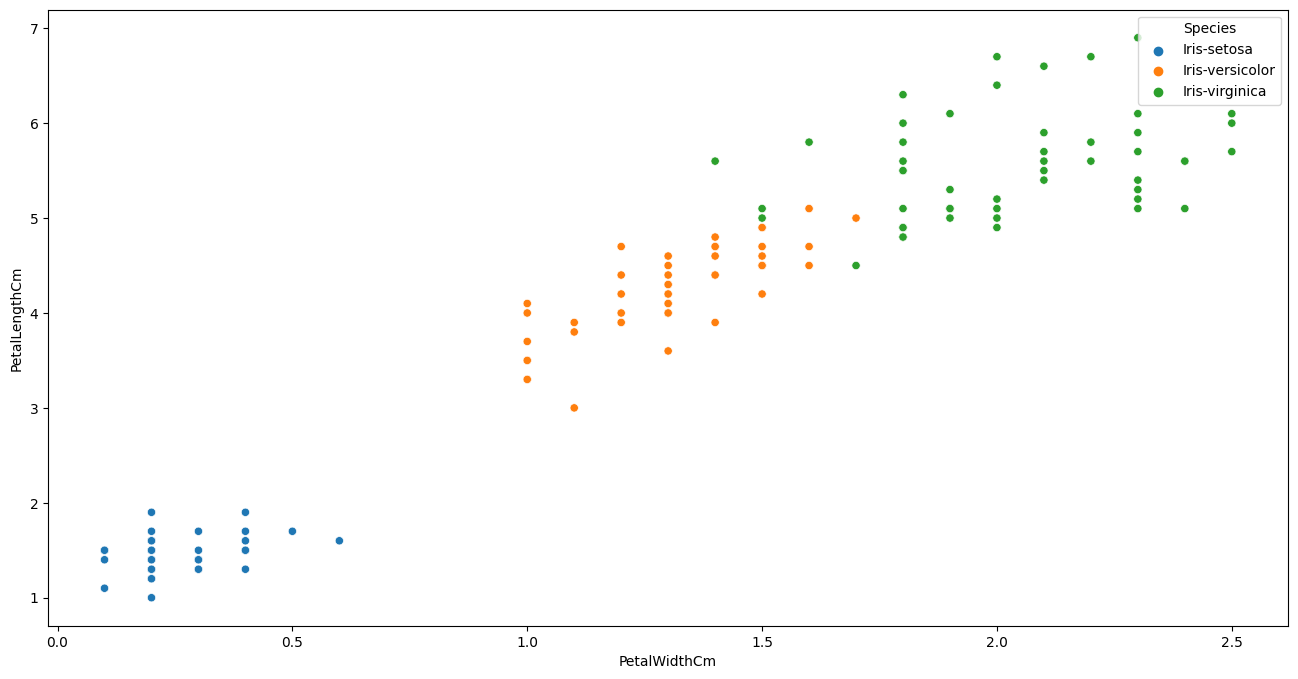

In [72]:
#lets see it in Graph, so we can understand
plt.figure(figsize= (16,8))
sns.scatterplot(data=df, x=df['PetalWidthCm'], y=df['PetalLengthCm'], hue = df['Species'])

In [73]:
X= df[['PetalLengthCm','PetalWidthCm','SepalLengthCm','SepalWidthCm']].values
y= df['Species'].values

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
from sklearn import metrics
#lets evaluate the prediction
y_predict = tree_model.predict(X_test)
print(classification_report(y_test, y_predict))

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.81      1.00      0.90        22
 Iris-virginica       1.00      0.72      0.84        18

       accuracy                           0.92        60
      macro avg       0.94      0.91      0.91        60
   weighted avg       0.93      0.92      0.91        60

DecisionTrees's Accuracy:  0.9166666666666666


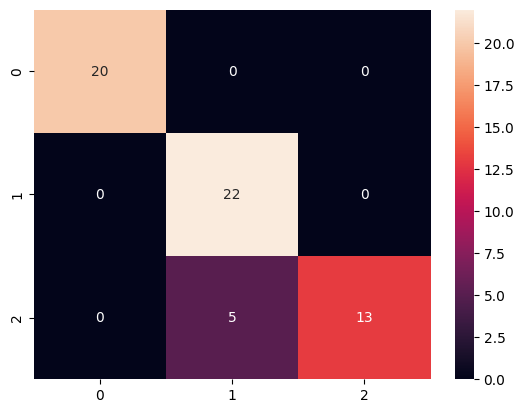

In [76]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [77]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

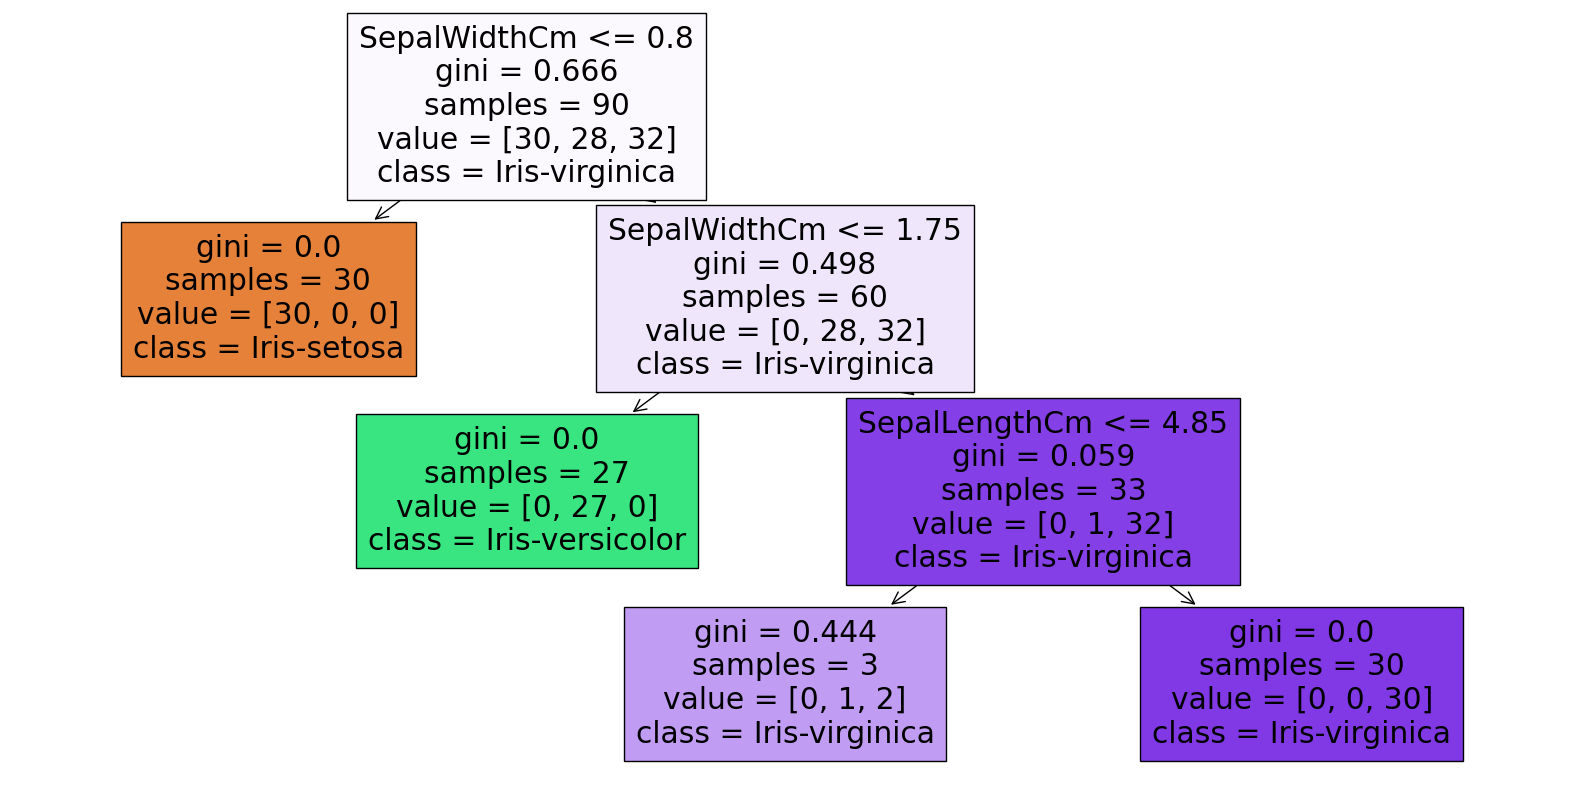

In [82]:
cols = df.drop('Species', axis=1).columns
classes = df['Species'].unique()

plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True)
plt.show()